In [1]:
%matplotlib inline

import numpy as np
import pandas as pd

from common_utils import *
from preprocessing_utils import *
from classification_validation_utils import *

In [2]:
""" 

FUNZIONI DI SOSTITUZIONE MISSING VALUES, RIMOZIONE ATTRIBUTI INUTILI, RIDEFINIZIONE VALORI VARIABILI
E DISCRETIZZAZIONE

"""

' \n\nFUNZIONI DI SOSTITUZIONE MISSING VALUES, RIMOZIONE ATTRIBUTI INUTILI, RIDEFINIZIONE VALORI VARIABILI\nE DISCRETIZZAZIONE\n\n'

In [3]:
originalDf = pd.read_csv("data/carvana_training.csv")

In [4]:
getMissingValues(originalDf)

[('PRIMEUNIT', 69564),
 ('AUCGUART', 69564),
 ('WheelType', 3174),
 ('WheelTypeID', 3169),
 ('Trim', 2360),
 ('MMRCurrentAuctionAveragePrice', 315),
 ('MMRCurrentAuctionCleanPrice', 315),
 ('MMRCurrentRetailAveragePrice', 315),
 ('MMRCurrentRetailCleanPrice', 315),
 ('MMRAcquisitionAuctionAveragePrice', 18),
 ('MMRAcquisitionAuctionCleanPrice', 18),
 ('MMRAcquisitionRetailAveragePrice', 18),
 ('MMRAcquisitonRetailCleanPrice', 18),
 ('Transmission', 9),
 ('SubModel', 8),
 ('Color', 8),
 ('Nationality', 5),
 ('Size', 5),
 ('TopThreeAmericanName', 5),
 ('RefId', 0),
 ('IsBadBuy', 0),
 ('PurchDate', 0),
 ('Auction', 0),
 ('VehYear', 0),
 ('VehicleAge', 0),
 ('Make', 0),
 ('Model', 0),
 ('VehOdo', 0),
 ('BYRNO', 0),
 ('VNZIP1', 0),
 ('VNST', 0),
 ('VehBCost', 0),
 ('IsOnlineSale', 0),
 ('WarrantyCost', 0)]

count    72983.000000
mean         0.122988
std          0.328425
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: IsBadBuy, dtype: float64
Distribuzione valori di IsBadBuy: 
0    64007
1     8976
Name: IsBadBuy, dtype: int64
Valori di IsBadBuy in percentuale: 
IsBadBuy
0    0.877012
1    0.122988
dtype: float64
count    72983.000000
mean         0.025280
std          0.156975
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: IsOnlineSale, dtype: float64
Distribuzione valori di IsOnlineSale: 
0    71138
1     1845
Name: IsOnlineSale, dtype: int64
Valori di IsOnlineSale in percentuale: 
IsOnlineSale
0    0.97472
1    0.02528
dtype: float64


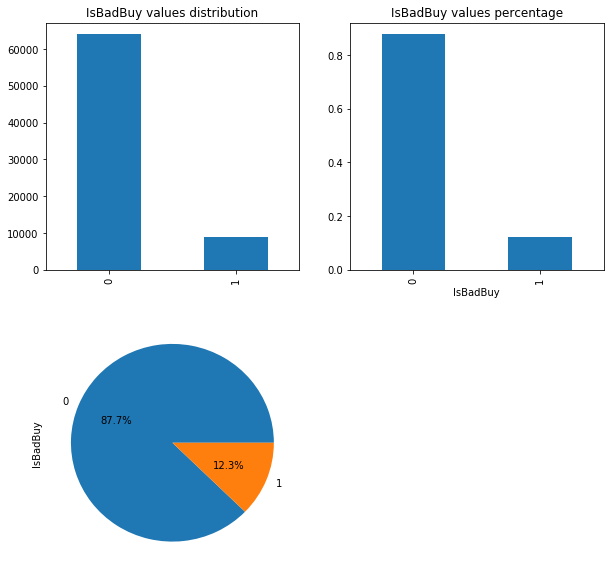

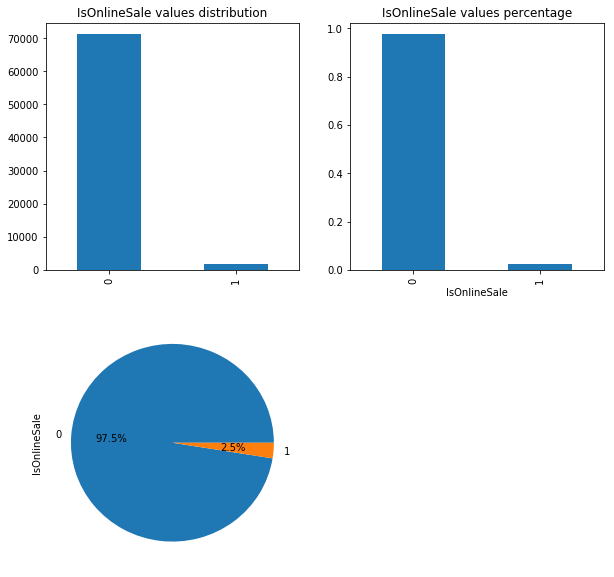

In [5]:
getSingleAttributeStats('IsBadBuy',originalDf)
getSingleAttributeStats('IsOnlineSale', originalDf)


IsBadBuy          0     1
IsOnlineSale             
0             62375  8763
1              1632   213
IsBadBuy             0         1
IsOnlineSale                    
0             0.876817  0.123183
1             0.884553  0.115447




IsOnlineSale      0     1
IsBadBuy                 
0             62375  1632
1              8763   213
IsOnlineSale         0         1
IsBadBuy                        
0             0.974503  0.025497
1             0.976270  0.023730


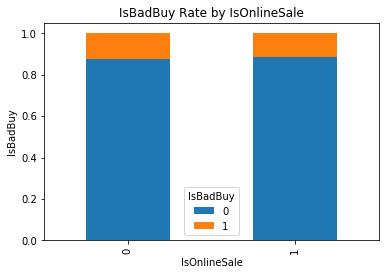

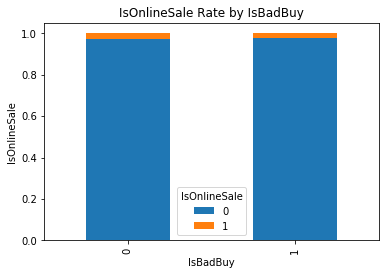

In [6]:
getTwoAttributesStats('IsOnlineSale','IsBadBuy', df=originalDf)

count     72978
unique        4
top          GM
freq      25314
Name: TopThreeAmericanName, dtype: object
Distribuzione valori di TopThreeAmericanName: 
GM          25314
CHRYSLER    23399
FORD        12315
OTHER       11950
Name: TopThreeAmericanName, dtype: int64
Valori di TopThreeAmericanName in percentuale: 
TopThreeAmericanName
CHRYSLER    0.320631
FORD        0.168749
GM          0.346872
OTHER       0.163748
dtype: float64


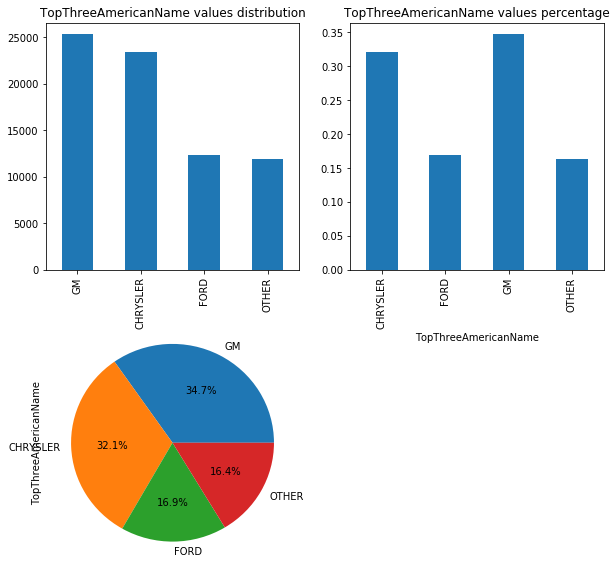

In [7]:
getSingleAttributeStats('TopThreeAmericanName',originalDf)

/home/honestus/UNIVERSITÀ/DM/DM1/PROGETTO/preprocessing_utils.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[attribute][~df[attribute].isin(list(df[attribute].value_counts()[:topN].keys()))]='Others'


count      72983
unique         6
top       Others
freq       18416
Name: Make, dtype: object
Distribuzione valori di Make: 
Others       18416
CHEVROLET    17248
DODGE        12912
FORD         11305
CHRYSLER      8844
PONTIAC       4258
Name: Make, dtype: int64
Valori di Make in percentuale: 
Make
CHEVROLET    0.236329
CHRYSLER     0.121179
DODGE        0.176918
FORD         0.154899
Others       0.252333
PONTIAC      0.058342
dtype: float64


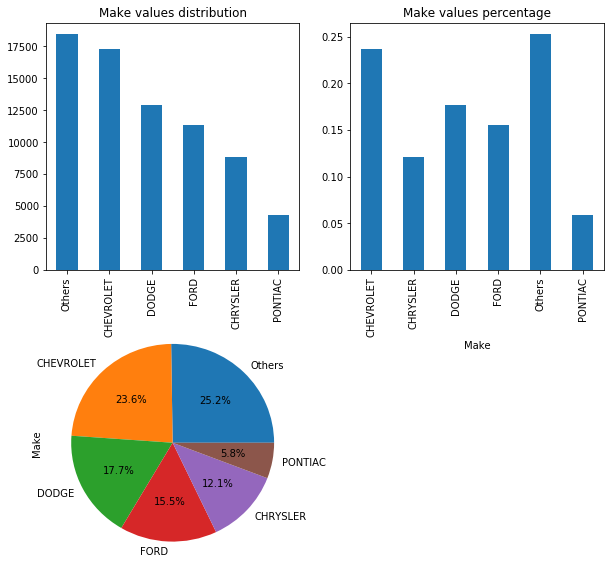

In [8]:
getSingleAttributeStats('Make',originalDf,toOthers=True, topN=5)

count     69809
unique        3
top       Alloy
freq      36050
Name: WheelType, dtype: object
Distribuzione valori di WheelType: 
Alloy      36050
Covers     33004
Special      755
Name: WheelType, dtype: int64
Valori di WheelType in percentuale: 
WheelType
Alloy      0.516409
Covers     0.472776
Special    0.010815
dtype: float64
Size       COMPACT  CROSSOVER  LARGE  LARGE SUV  LARGE TRUCK  MEDIUM  \
WheelType                                                              
Alloy         2298       1308   4589       1274         2404   11532   
Covers        4427        357   3885         40          576   17656   
Special         83         11     52         50           82     281   

Size       MEDIUM SUV  SMALL SUV  SMALL TRUCK  SPECIALTY  SPORTS   VAN  
WheelType                                                               
Alloy            6869       1882          636        616     713  1928  
Covers            761        263          168       1193       6  3668  
Special      

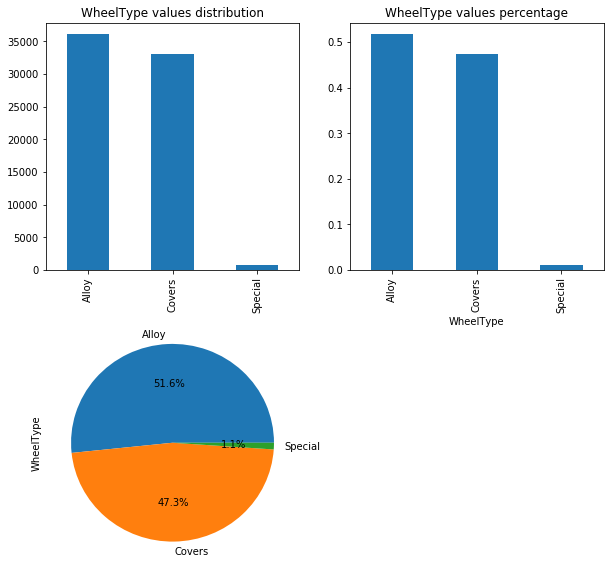

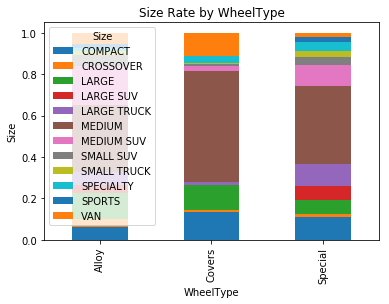

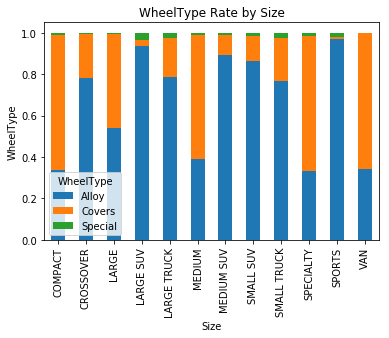

In [9]:
getSingleAttributeStats('WheelType',originalDf)
getTwoAttributesStats('WheelType','Size',originalDf)

/home/honestus/UNIVERSITÀ/DM/DM1/PROGETTO/preprocessing_utils.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[attribute][df[attribute].isin(valuesToRepl)]='Others'


count         72983
unique            7
top       CHEVROLET
freq          17248
Name: Make, dtype: object
Distribuzione valori di Make: 
CHEVROLET    17248
Others       15932
DODGE        12912
FORD         11305
CHRYSLER      8844
PONTIAC       4258
KIA           2484
Name: Make, dtype: int64
Valori di Make in percentuale: 
Make
CHEVROLET    0.236329
CHRYSLER     0.121179
DODGE        0.176918
FORD         0.154899
KIA          0.034035
Others       0.218297
PONTIAC      0.058342
dtype: float64


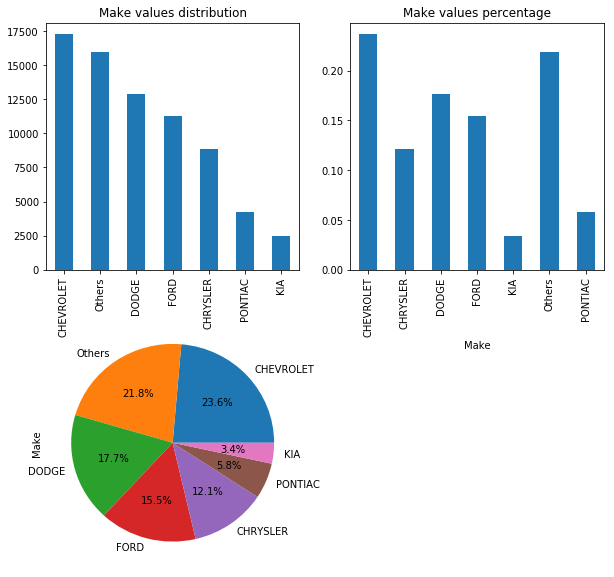

In [10]:
getSingleAttributeStats('Make',originalDf, toOthers=True, valueToCut=0.03)

count    72668.000000
mean      6132.081287
std       2434.567723
min          0.000000
25%       4275.000000
50%       6062.000000
75%       7736.000000
max      35722.000000
Name: MMRCurrentAuctionAveragePrice, dtype: float64


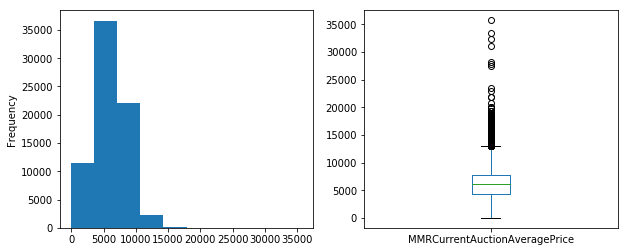

In [11]:
getSingleContinueAttributeStats(attribute='MMRCurrentAuctionAveragePrice',df=originalDf)

count     72983.000000
mean      71499.995917
std       14578.913128
min        4825.000000
25%       61837.000000
50%       73361.000000
75%       82436.000000
max      115717.000000
Name: VehOdo, dtype: float64


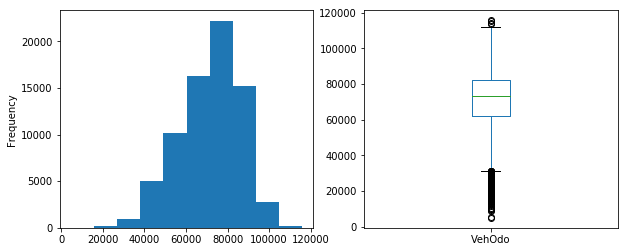

In [12]:
getSingleContinueAttributeStats(attribute='VehOdo',df=originalDf)

In [13]:
#SOSTITUZIONE DEI MISSING VALUES NEGLI ATTRIBUTI CHE LI HANNO

In [14]:
#lo faccio ma non serve... toglieremo top3AmericanName dagli attributi che utilizzeremo
#perchè è troppo simile a nationality
originalDf.TopThreeAmericanName = originalDf.TopThreeAmericanName.groupby(originalDf.Make).apply \
(lambda x: x.fillna(getMostFrequent(x)))

In [15]:
tmpDf = replaceMissingValues(df=originalDf)

/home/honestus/UNIVERSITÀ/DM/DM1/PROGETTO/preprocessing_utils.py:167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df ["Color"] [df["Color"]=='NOT AVAIL'] = df["Color"].map(lambda x: np.nan)
/home/honestus/UNIVERSITÀ/DM/DM1/PROGETTO/preprocessing_utils.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  sizes [df['Size'].isin(['MEDIUM SUV','CROSSOVER'])]='MEDIUM'
/home/honestus/UNIVERSITÀ/DM/DM1/PROGETTO/preprocessing_utils.py:126: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  sizes

In [16]:
getMissingValues(tmpDf)

[('PRIMEUNIT', 69564),
 ('AUCGUART', 69564),
 ('WheelTypeID', 3169),
 ('MMRAcquisitionAuctionCleanPrice', 846),
 ('MMRAcquisitionRetailAveragePrice', 846),
 ('MMRAcquisitonRetailCleanPrice', 846),
 ('MMRCurrentRetailAveragePrice', 819),
 ('MMRCurrentAuctionAveragePrice', 315),
 ('MMRCurrentAuctionCleanPrice', 315),
 ('MMRCurrentRetailCleanPrice', 315),
 ('MMRCurrentRetailAveragePriceFill', 23),
 ('MMRAcquisitionAuctionAveragePrice', 18),
 ('SubModel', 8),
 ('RefId', 0),
 ('IsBadBuy', 0),
 ('PurchDate', 0),
 ('Auction', 0),
 ('VehYear', 0),
 ('VehicleAge', 0),
 ('Make', 0),
 ('Model', 0),
 ('Trim', 0),
 ('Color', 0),
 ('Transmission', 0),
 ('WheelType', 0),
 ('VehOdo', 0),
 ('Nationality', 0),
 ('Size', 0),
 ('TopThreeAmericanName', 0),
 ('BYRNO', 0),
 ('VNZIP1', 0),
 ('VNST', 0),
 ('VehBCost', 0),
 ('IsOnlineSale', 0),
 ('WarrantyCost', 0),
 ('Sizes', 0)]

In [17]:
tmpDf = removeAttributes(df=tmpDf)
tmpDf

,IsBadBuy,PurchDate,Auction,VehicleAge,Make,Trim,Color,Transmission,WheelType,VehOdo,Nationality,Size,VNZIP1,VNST,VehBCost,WarrantyCost,Sizes,MMRCurrentRetailAveragePriceFill
0,0,12/7/2009,ADESA,3,MAZDA,i,RED,AUTO,Alloy,89046,OTHER ASIAN,MEDIUM,33619,FL,7100.0,1113,MEDIUM,11597.0
1,0,12/7/2009,ADESA,5,DODGE,ST,WHITE,AUTO,Alloy,93593,AMERICAN,LARGE,33619,FL,7600.0,1053,LARGE,11374.0
2,0,12/7/2009,ADESA,4,DODGE,SXT,MAROON,AUTO,Covers,73807,AMERICAN,MEDIUM,33619,FL,4900.0,1389,MEDIUM,7146.0
3,0,12/7/2009,ADESA,5,DODGE,SXT,SILVER,AUTO,Alloy,65617,AMERICAN,COMPACT,33619,FL,4100.0,630,COMPACT,4375.0
4,0,12/7/2009,ADESA,4,FORD,ZX3,SILVER,MANUAL,Covers,69367,AMERICAN,COMPACT,33619,FL,4000.0,1020,COMPACT,6739.0
5,0,12/7/2009,ADESA,5,MITSUBISHI,ES,WHITE,AUTO,Covers,81054,OTHER ASIAN,MEDIUM,33619,FL,5600.0,594,MEDIUM,8149.0
6,0,12/7/2009,ADESA,5,KIA,EX,BLACK,AUTO,Covers,65328,OTHER ASIAN,MEDIUM,33619,FL,4200.0,533,MEDIUM,6230.0
7,0,12/7/2009,ADESA,4,FORD,SE,WHITE,AUTO,Covers,65805,AMERICAN,MEDIUM,33619,FL,4500.0,825,MEDIUM,6942.0
8,0,12/7/2009,ADESA,2,KIA,EX,BLACK,AUTO,Covers,49921,OTHER ASIAN,MEDIUM,33619,FL,5600.0,482,MEDIUM,9637.0
9,0,12/7/2009,ADESA,2,FORD,SEL,RED,AUTO,Alloy,84872,AMERICAN,LARGE,33619,FL,7700.0,1633,LARGE,12580.0


In [18]:
fillToOthers(attribute='Make',df=tmpDf,valueToCut=0.07)

/home/honestus/UNIVERSITÀ/DM/DM1/PROGETTO/preprocessing_utils.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[attribute][df[attribute].isin(valuesToRepl)]='Others'


,IsBadBuy,PurchDate,Auction,VehicleAge,Make,Trim,Color,Transmission,WheelType,VehOdo,Nationality,Size,VNZIP1,VNST,VehBCost,WarrantyCost,Sizes,MMRCurrentRetailAveragePriceFill
0,0,12/7/2009,ADESA,3,Others,i,RED,AUTO,Alloy,89046,OTHER ASIAN,MEDIUM,33619,FL,7100.0,1113,MEDIUM,11597.0
1,0,12/7/2009,ADESA,5,DODGE,ST,WHITE,AUTO,Alloy,93593,AMERICAN,LARGE,33619,FL,7600.0,1053,LARGE,11374.0
2,0,12/7/2009,ADESA,4,DODGE,SXT,MAROON,AUTO,Covers,73807,AMERICAN,MEDIUM,33619,FL,4900.0,1389,MEDIUM,7146.0
3,0,12/7/2009,ADESA,5,DODGE,SXT,SILVER,AUTO,Alloy,65617,AMERICAN,COMPACT,33619,FL,4100.0,630,COMPACT,4375.0
4,0,12/7/2009,ADESA,4,FORD,ZX3,SILVER,MANUAL,Covers,69367,AMERICAN,COMPACT,33619,FL,4000.0,1020,COMPACT,6739.0
5,0,12/7/2009,ADESA,5,Others,ES,WHITE,AUTO,Covers,81054,OTHER ASIAN,MEDIUM,33619,FL,5600.0,594,MEDIUM,8149.0
6,0,12/7/2009,ADESA,5,Others,EX,BLACK,AUTO,Covers,65328,OTHER ASIAN,MEDIUM,33619,FL,4200.0,533,MEDIUM,6230.0
7,0,12/7/2009,ADESA,4,FORD,SE,WHITE,AUTO,Covers,65805,AMERICAN,MEDIUM,33619,FL,4500.0,825,MEDIUM,6942.0
8,0,12/7/2009,ADESA,2,Others,EX,BLACK,AUTO,Covers,49921,OTHER ASIAN,MEDIUM,33619,FL,5600.0,482,MEDIUM,9637.0
9,0,12/7/2009,ADESA,2,FORD,SEL,RED,AUTO,Alloy,84872,AMERICAN,LARGE,33619,FL,7700.0,1633,LARGE,12580.0
